<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Mining-the-&quot;Big-Two&quot;-SAP-FI-Tables" data-toc-modified-id="Data-Mining-the-&quot;Big-Two&quot;-SAP-FI-Tables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Mining the "Big Two" SAP FI Tables</a></span><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Scope" data-toc-modified-id="Scope-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scope</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Transforming-the-data" data-toc-modified-id="Transforming-the-data-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Transforming the data</a></span></li></ul></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Vendor-Analysis" data-toc-modified-id="Vendor-Analysis-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Vendor Analysis</a></span></li><li><span><a href="#User-Analysis" data-toc-modified-id="User-Analysis-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>User Analysis</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Disclaimer" data-toc-modified-id="Disclaimer-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Disclaimer</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Appendix</a></span></li></ul></li></ul></div>

# Data Mining the "Big Two" SAP FI Tables

## Executive Summary

Using a forensic accounting technique on SAP data, there is evidence that almost 50 vendor payments worth nearly **$4 million** are irregular and should be investigated further.

***

## Scope

I am tasked with the preliminary data analysis on two SAP Financial Accounting transaction tables.  Specifically I will apply a fraud detection technique to screen the dataset and determine if any further investigation will be required.

### Data

The data consists of 2 CSV files with sample SAP outputs for 2017 from the BSEG and BKPF tables.  Data was sourced from Michael Schermann.  The BSEG table records the transaction line items and the BKPF table records the corresponding headers.  Here are the high level ETL steps required to prepare our data:

1. Importing the necessary libraries
2. Loading into the dataframe
3. Wrangling and cleansing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Loading the data

In [2]:
bseg = pd.read_csv('BSEG.csv', low_memory = False)
bkpf = pd.read_csv('BKPF.csv', low_memory = False)

In [3]:
bseg.head()

,Unnamed: 0,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BUZID,AUGDT,AUGCP,AUGBL,...,PEROP_END,FASTPAY,IGNR_IVREF,FMFGUS_KEY,FMXDOCNR,FMXYEAR,FMXDOCLN,FMXZEKKN,PRODPER,RECRF
0,0,375,US00,1.500000e+09,2017,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,1,375,US00,1.500000e+09,2017,2,NaN,1/24/17,1/24/17,1.500000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,2,375,US00,1.500000e+09,2017,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,3,375,US00,1.500000e+09,2017,2,NaN,1/24/17,1/24/17,1.500000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,4,375,US00,1.500000e+09,2017,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


As there is an unnamed column is read into the data frame, I will reimport the CSV using the 1st column as the index.

In [4]:
bseg = pd.read_csv('BSEG.csv', low_memory = False, index_col = 0)

bseg.head()

,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BUZID,AUGDT,AUGCP,AUGBL,BSCHL,...,PEROP_END,FASTPAY,IGNR_IVREF,FMFGUS_KEY,FMXDOCNR,FMXYEAR,FMXDOCLN,FMXZEKKN,PRODPER,RECRF
0,375,US00,1.500000e+09,2017,1,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,375,US00,1.500000e+09,2017,2,NaN,1/24/17,1/24/17,1.500000e+09,25,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,375,US00,1.500000e+09,2017,1,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,375,US00,1.500000e+09,2017,2,NaN,1/24/17,1/24/17,1.500000e+09,25,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,375,US00,1.500000e+09,2017,1,NaN,NaN,NaN,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


In [5]:
bseg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 0 to 2810
Columns: 336 entries, MANDT to RECRF
dtypes: float64(180), int64(104), object(52)
memory usage: 7.2+ MB


In [6]:
bseg.columns.values

array(['MANDT', 'BUKRS', 'BELNR', 'GJAHR', 'BUZEI', 'BUZID', 'AUGDT',
       'AUGCP', 'AUGBL', 'BSCHL', 'KOART', 'UMSKZ', 'UMSKS', 'ZUMSK',
       'SHKZG', 'GSBER', 'PARGB', 'MWSKZ', 'QSSKZ', 'DMBTR', 'WRBTR',
       'KZBTR', 'PSWBT', 'PSWSL', 'TXBHW', 'TXBFW', 'MWSTS', 'WMWST',
       'HWBAS', 'FWBAS', 'HWZUZ', 'FWZUZ', 'SHZUZ', 'STEKZ', 'MWART',
       'TXGRP', 'KTOSL', 'QSSHB', 'KURSR', 'GBETR', 'BDIFF', 'BDIF2',
       'VALUT', 'ZUONR', 'SGTXT', 'ZINKZ', 'VBUND', 'BEWAR', 'ALTKT',
       'VORGN', 'FDLEV', 'FDGRP', 'FDWBT', 'FDTAG', 'FKONT', 'KOKRS',
       'KOSTL', 'PROJN', 'AUFNR', 'VBELN', 'VBEL2', 'POSN2', 'ETEN2',
       'ANLN1', 'ANLN2', 'ANBWA', 'BZDAT', 'PERNR', 'XUMSW', 'XHRES',
       'XKRES', 'XOPVW', 'XCPDD', 'XSKST', 'XSAUF', 'XSPRO', 'XSERG',
       'XFAKT', 'XUMAN', 'XANET', 'XSKRL', 'XINVE', 'XPANZ', 'XAUTO',
       'XNCOP', 'XZAHL', 'SAKNR', 'HKONT', 'KUNNR', 'LIFNR', 'FILKD',
       'XBILK', 'GVTYP', 'HZUON', 'ZFBDT', 'ZTERM', 'ZBD1T', 'ZBD2T',
       'ZBD3T', 'ZBD

336 columns.  Which are actually useful?  With some additional research and sleuthing, I was able to narrow down the columns in this table to just 5 in particular.  However, before dropping the remainder, I wanted to skim the summary statistics.

In [7]:
bseg.describe()

,MANDT,BELNR,GJAHR,BUZEI,AUGBL,BSCHL,UMSKZ,UMSKS,ZUMSK,QSSKZ,...,PEROP_END,FASTPAY,IGNR_IVREF,FMFGUS_KEY,FMXDOCNR,FMXYEAR,FMXDOCLN,FMXZEKKN,PRODPER,RECRF
count,2811.0,2.811000e+03,2811.0,2811.000000,7.030000e+02,2811.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2811.0,2811.0,0.0,0.0
mean,375.0,4.043594e+09,2017.0,1.675916,1.515363e+09,67.438634,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
std,0.0,1.596921e+09,0.0,0.726656,5.329699e+07,28.122635,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
min,375.0,1.500000e+09,2017.0,1.000000,1.500000e+09,21.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
25%,375.0,1.500000e+09,2017.0,1.000000,1.500000e+09,31.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
50%,375.0,5.000000e+09,2017.0,2.000000,1.500000e+09,86.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
75%,375.0,5.105600e+09,2017.0,2.000000,1.500000e+09,89.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
max,375.0,5.105601e+09,2017.0,9.000000,1.700000e+09,99.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [8]:
bseg.dtypes

MANDT         int64
BUKRS        object
BELNR       float64
GJAHR         int64
BUZEI         int64
             ...   
FMXYEAR     float64
FMXDOCLN      int64
FMXZEKKN      int64
PRODPER     float64
RECRF       float64
Length: 336, dtype: object

MANDT, BELNR, GJAHR, BUZEI, and BSCHL are accounted for.  I will need to validate that BUKRS, WRBTR, and LIFNR also exists.

In [9]:
bseg['BUKRS'].describe()

count     2811
unique       1
top       US00
freq      2811
Name: BUKRS, dtype: object

In [10]:
bseg['WRBTR'].describe()

count         2811
unique         494
top       1,000.00
freq           202
Name: WRBTR, dtype: object

Notice that the amount field is currently a string but contains commas and periods.  These will have to be removed in order to extract the significant digits.

In [11]:
bseg['WRBTR'] = bseg['WRBTR'].replace({',': ''}, regex = True)
bseg['WRBTR'] = pd.to_numeric(bseg['WRBTR'], errors = 'coerce').astype(int)
bseg['WRBTR'] = bseg['WRBTR'].apply(str)
bseg['WRBTR'].sample(10, random_state = 101)

572         1000
579         1000
1001         371
1219         240
1469    15625000
1998       12200
1769       15000
501       144000
1869          40
218         2900
Name: WRBTR, dtype: object

In [12]:
bseg['LIFNR'].describe()

count      1807.000000
mean     125088.422247
std          42.827934
min      125000.000000
25%      125053.000000
50%      125102.000000
75%      125126.000000
max      125136.000000
Name: LIFNR, dtype: float64

In [13]:
bseg = bseg[['MANDT', 'BUKRS', 'BELNR', 'GJAHR', 'BUZEI', 'BSCHL', 'WRBTR', 'LIFNR']]
bseg.sample(10, random_state = 101)

,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,WRBTR,LIFNR
572,375,US00,1.500000e+09,2017,1,50,1000,NaN
579,375,US00,1.500000e+09,2017,2,25,1000,125135.0
1001,375,US00,5.000000e+09,2017,3,86,371,125070.0
1219,375,US00,5.000000e+09,2017,1,89,240,125070.0
1469,375,US00,5.000000e+09,2017,1,99,15625000,125088.0
1998,375,US00,5.105600e+09,2017,2,86,12200,NaN
1769,375,US00,5.105600e+09,2017,1,96,15000,NaN
501,375,US00,1.500000e+09,2017,1,50,144000,NaN
1869,375,US00,5.105600e+09,2017,2,86,40,NaN
218,375,US00,1.500000e+09,2017,2,25,2900,125135.0


In [14]:
bseg_dupe = bseg[bseg.duplicated()]
print("Number of duplicate rows: ", bseg_dupe.shape)

Number of duplicate rows:  (0, 8)


There are no duplicate rows, otherwise the .drop_duplicates() function can be used.

In [15]:
print(bseg.isnull().sum())

MANDT       0
BUKRS       0
BELNR       0
GJAHR       0
BUZEI       0
BSCHL       0
WRBTR       0
LIFNR    1004
dtype: int64


LIFNR has a significant amount of null values.  I will keep the field but clearly further work should be done to understand the reasoning behind this.  Should null vendors even be allowed into transactions?

In [16]:
bsegNull = bseg[bseg['LIFNR'].isnull()]
bsegNull.head()

,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,WRBTR,LIFNR
0,375,US00,1.500000e+09,2017,1,50,213710,NaN
2,375,US00,1.500000e+09,2017,1,50,1068550,NaN
4,375,US00,1.500000e+09,2017,1,50,933153,NaN
6,375,US00,1.500000e+09,2017,1,50,1050,NaN
8,375,US00,1.500000e+09,2017,1,50,30300,NaN


In [17]:
bsegNull['WRBTR'] = pd.to_numeric(bsegNull['WRBTR'], errors = 'coerce')
bsegNull['WRBTR'].value_counts()

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1000       89
10000      50
100000     35
1000000    24
200000     21
           ..
82677       1
933153      1
93959       1
24154       1
1299        1
Name: WRBTR, Length: 342, dtype: int64

In [18]:
bseg['LIFNR'].value_counts()

125104.0    140
125131.0    139
125135.0    133
125094.0    129
125000.0     68
           ... 
125002.0      3
125082.0      3
125048.0      3
125028.0      2
125013.0      1
Name: LIFNR, Length: 105, dtype: int64

I replace the null values with an arbitrary 999999 value to include this data into the later calculations.

In [19]:
bseg['LIFNR'].fillna('999999', inplace = True)
print(bseg.isnull().sum())

MANDT    0
BUKRS    0
BELNR    0
GJAHR    0
BUZEI    0
BSCHL    0
WRBTR    0
LIFNR    0
dtype: int64


#### Transforming the data

BSCHL is the posting key which is our field of interest as it indicates whether the entry is debit or credit and to what type of account it is executed on (e.g. GL, customer, vendor, assets, material).  More importantly, I will extract digits from our WRBTR field which represents the amount and will enable the analysis.

In [20]:
bseg_stg = bseg[(bseg['WRBTR'].str.len() > 3) & (bseg['WRBTR'].str.contains('-') == False)]
#bseg_stg = bseg[(bseg['WRBTR'] > 1000)]

bseg_stg['Digit 1'] = bseg_stg['WRBTR'].astype(str).str[0:1].astype(int)
bseg_stg['Digit 2'] = bseg_stg['WRBTR'].astype(str).str[1:2].astype(int)
bseg_stg['Digit 3'] = bseg_stg['WRBTR'].astype(str).str[2:3].astype(int)

bseg_stg.sample(10, random_state = 101)

C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\DW814QU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,MANDT,BUKRS,BELNR,GJAHR,BUZEI,BSCHL,WRBTR,LIFNR,Digit 1,Digit 2,Digit 3
2330,375,US00,5.105600e+09,2017,5,86,4750,999999,4,7,5
2223,375,US00,5.105600e+09,2017,2,86,10100,999999,1,0,1
1972,375,US00,5.105600e+09,2017,2,93,1000000,999999,1,0,0
1472,375,US00,5.000000e+09,2017,1,91,15000000,125088,1,5,0
348,375,US00,1.500000e+09,2017,1,50,85074,999999,8,5,0
61,375,US00,1.500000e+09,2017,1,50,100000,999999,1,0,0
1055,375,US00,5.000000e+09,2017,2,96,12400,125094,1,2,4
2737,375,US00,1.500000e+09,2017,1,50,1927,999999,1,9,2
381,375,US00,1.500000e+09,2017,1,50,43136,999999,4,3,1
596,375,US00,1.500000e+09,2017,1,50,1000,999999,1,0,0


For data processing, I have filtered for only amounts that are at least $1,000 while retaining the amount field as a string to extract the digits.  

In [21]:
bkpf.head()

,Unnamed: 0,MANDT,BUKRS,BELNR,GJAHR,BLART,BLDAT,BUDAT,MONAT,CPUDT,...,SSBLK,BATCH,SNAME,SAMPLED,EXCLUDE_FLAG,BLIND,OFFSET_STATUS,OFFSET_REFER_DAT,PENRC,KNUMV
0,0,375,US00,90000000,2016,RV,5/27/16,5/27/16,5,5/27/16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,375,US00,90000001,2016,RV,5/27/16,5/27/16,5,5/27/16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,375,US00,90000002,2016,RV,5/27/16,5/27/16,5,5/27/16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,375,US00,1400000000,2016,DZ,5/27/16,5/27/16,5,5/27/16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,375,US00,1400000001,2016,DZ,5/27/16,5/27/16,5,5/27/16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
bkpf = pd.read_csv('BKPF.csv', low_memory = False, index_col = 0)

bkpf.head()

,MANDT,BUKRS,BELNR,GJAHR,BLART,BLDAT,BUDAT,MONAT,CPUDT,CPUTM,...,SSBLK,BATCH,SNAME,SAMPLED,EXCLUDE_FLAG,BLIND,OFFSET_STATUS,OFFSET_REFER_DAT,PENRC,KNUMV
0,375,US00,90000000,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:33 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,375,US00,90000001,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:42 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,375,US00,90000002,2016,RV,5/27/16,5/27/16,5,5/27/16,1:50:44 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,375,US00,1400000000,2016,DZ,5/27/16,5/27/16,5,5/27/16,1:53:58 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,375,US00,1400000001,2016,DZ,5/27/16,5/27/16,5,5/27/16,1:53:58 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
bkpf.columns.values

array(['MANDT', 'BUKRS', 'BELNR', 'GJAHR', 'BLART', 'BLDAT', 'BUDAT',
       'MONAT', 'CPUDT', 'CPUTM', 'AEDAT', 'UPDDT', 'WWERT', 'USNAM',
       'TCODE', 'BVORG', 'XBLNR', 'DBBLG', 'STBLG', 'STJAH', 'BKTXT',
       'WAERS', 'KURSF', 'KZWRS', 'KZKRS', 'BSTAT', 'XNETB', 'FRATH',
       'XRUEB', 'GLVOR', 'GRPID', 'DOKID', 'ARCID', 'IBLAR', 'AWTYP',
       'AWKEY', 'FIKRS', 'HWAER', 'HWAE2', 'HWAE3', 'KURS2', 'KURS3',
       'BASW2', 'BASW3', 'UMRD2', 'UMRD3', 'XSTOV', 'STODT', 'XMWST',
       'CURT2', 'CURT3', 'KUTY2', 'KUTY3', 'XSNET', 'AUSBK', 'XUSVR',
       'DUEFL', 'AWSYS', 'TXKRS', 'CTXKRS', 'LOTKZ', 'XWVOF', 'STGRD',
       'PPNAM', 'BRNCH', 'NUMPG', 'ADISC', 'XREF1_HD', 'XREF2_HD',
       'XREVERSAL', 'REINDAT', 'RLDNR', 'LDGRP', 'PROPMANO', 'XBLNR_ALT',
       'VATDATE', 'DOCCAT', 'XSPLIT', 'CASH_ALLOC', 'FOLLOW_ON', 'XREORG',
       'SUBSET', 'KURST', 'KURSX', 'KUR2X', 'KUR3X', 'XMCA',
       'RESUBMISSION', '/SAPF15/STATUS', 'PSOTY', 'PSOAK', 'PSOKS',
       'PSOSG', 'PSOFN',

113 columns.  Which are actually useful?  With some additional research and sleuthing, I was able to narrow down the columns in this table to just 5 in particular.  However, before dropping the remainder, I wanted to skim the summary statistics.

In [24]:
bkpf.describe()

,MANDT,BELNR,GJAHR,MONAT,UPDDT,DBBLG,STBLG,STJAH,BKTXT,KZWRS,...,SSBLK,BATCH,SNAME,SAMPLED,EXCLUDE_FLAG,BLIND,OFFSET_STATUS,OFFSET_REFER_DAT,PENRC,KNUMV
count,3313.0,3.313000e+03,3313.000000,3313.000000,0.0,0.0,0.0,3313.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,375.0,4.542381e+09,2016.378811,3.835497,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,1.110655e+09,0.485164,1.500135,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,375.0,9.000000e+07,2016.000000,1.000000,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,375.0,4.900000e+09,2016.000000,2.000000,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,375.0,4.900001e+09,2016.000000,5.000000,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,375.0,5.000000e+09,2017.000000,5.000000,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,375.0,5.105601e+09,2017.000000,5.000000,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
bkpf.dtypes

MANDT                 int64
BUKRS                object
BELNR                 int64
GJAHR                 int64
BLART                object
                     ...   
BLIND               float64
OFFSET_STATUS       float64
OFFSET_REFER_DAT    float64
PENRC               float64
KNUMV               float64
Length: 113, dtype: object

MANDT, BUKRS, BELNR, and GJAHR are accounted for.  I will need to validate that BLART and USNAM also exists.

In [26]:
bkpf['USNAM'].describe()

count          3313
unique           32
top       BOETTCHER
freq           2048
Name: USNAM, dtype: object

In [27]:
bkpf = bkpf[['MANDT', 'BUKRS', 'BELNR', 'GJAHR', 'BLART', 'USNAM']]
bkpf.sample(10, random_state = 101)

,MANDT,BUKRS,BELNR,GJAHR,BLART,USNAM
2673,375,US00,5000000310,2017,WE,GBI-005
1876,375,US00,4900001562,2016,WA,BOETTCHER
56,375,US00,1500000050,2017,KZ,GBIFAC-01
2103,375,US00,4900001789,2016,WA,BOETTCHER
2990,375,US00,5105600302,2017,RE,GBI-022
1481,375,US00,4900001167,2016,WA,BOETTCHER
3180,375,US00,5105600494,2017,RE,GBI-008
2962,375,US00,5105600274,2017,RE,GBI-064
2515,375,US00,5000000152,2017,WE,GBI-005
439,375,US00,4900000125,2016,WA,BOETTCHER


BLART is the document type which is our key field of interest.

In [28]:
bkpf_dupe = bkpf[bkpf.duplicated()]
print("Number of duplicate rows: ", bkpf_dupe.shape)

Number of duplicate rows:  (0, 6)


Again, there are no duplicate rows.

In [29]:
print(bkpf.isnull().sum())

MANDT    0
BUKRS    0
BELNR    0
GJAHR    0
BLART    0
USNAM    0
dtype: int64


There are no null values.

In [30]:
bseg25 = bseg_stg[bseg_stg['BSCHL'] == 25]
bkpfKZ = bkpf[bkpf['BLART'] == 'KZ']

bseg25.shape, bkpfKZ.shape

((342, 11), (355, 6))

The measure of interest will be vendor transactions that are debit entries (i.e. outgoing vendor payments), so I left join using the Accounting Document Number in order to retain all 342 transaction line items.

In [31]:
merged = pd.merge(bseg25, bkpfKZ, on = 'BELNR', how = 'left')
merged

,MANDT_x,BUKRS_x,BELNR,GJAHR_x,BUZEI,BSCHL,WRBTR,LIFNR,Digit 1,Digit 2,Digit 3,MANDT_y,BUKRS_y,GJAHR_y,BLART,USNAM
0,375,US00,1.500000e+09,2017,2,25,213710,125131,2,1,3,375.0,US00,2017.0,KZ,GBI-005
1,375,US00,1.500000e+09,2017,2,25,1068550,125131,1,0,6,375.0,US00,2017.0,KZ,GBI-005
2,375,US00,1.500000e+09,2017,2,25,933153,125135,9,3,3,375.0,US00,2017.0,KZ,GBI-005
3,375,US00,1.500000e+09,2017,2,25,1050,125135,1,0,5,375.0,US00,2017.0,KZ,GBI-005
4,375,US00,1.500000e+09,2017,2,25,30300,125131,3,0,3,375.0,US00,2017.0,KZ,GBI-005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,375,US00,1.500000e+09,2017,2,25,1000,125107,1,0,0,375.0,US00,2017.0,KZ,GBIFAC-01
338,375,US00,1.500000e+09,2017,2,25,1000,125107,1,0,0,375.0,US00,2017.0,KZ,GBIFAC-01
339,375,US00,1.500000e+09,2017,2,25,1000,125107,1,0,0,375.0,US00,2017.0,KZ,GBIFAC-01
340,375,US00,1.500000e+09,2017,2,25,1000,125107,1,0,0,375.0,US00,2017.0,KZ,GBIFAC-01


### Methodology

Now that the data has been wrangled and cleansed, I will apply Benford's law to examine the transaction data.  Simply stated, Benford's law is used to analyze the validity and authenticity of financial records.  In naturally occurring distributions, the leading significant sigit will follow a right-skewed distribution.  In other words, the digits have non-equal chances of being the leading digit.  As a limitation, Benford's law should not be used for datasets with constraints such as minimums, maximums, and numbering conventions or structures.  This includes phone numbers, hourly wage rates, and heights for instance.

In [32]:
import math
benford = [math.log((1+1/d)) / math.log(10) for d in range(1, 10)]
d = {
    'n': range(1, 10),
    'b': benford
}
benford_predict = pd.DataFrame(d)
benford

[0.30102999566398114,
 0.17609125905568124,
 0.1249387366082999,
 0.0969100130080564,
 0.0791812460476248,
 0.06694678963061322,
 0.057991946977686726,
 0.051152522447381284,
 0.04575749056067514]

The output dictates the proportion of leading digits that is expected from a Benford distrbution.  That is, the digit 1 should appear 30% of the time as the first digit in the dataset as opposed to 5% for the digit 9.

### Analysis

In order to apply the Benford analysis, I will convert the vendor values into a relative count and display the vendor count as a percentage.

In [33]:
vendor = merged.groupby(['Digit 1'])['Digit 1'].count().reset_index(name='Vendor Count')
vendor_Total = vendor.groupby(['Digit 1'])['Vendor Count'].sum().rename('Percentage')
vendor_Total

vendor_Percentage = vendor_Total / vendor_Total.sum()
vendor_Percentage
pd.DataFrame(vendor_Percentage)

,Percentage
Digit 1,
1,0.520468
2,0.114035
3,0.038012
4,0.040936
5,0.040936
6,0.032164
7,0.064327
8,0.064327
9,0.084795


Our exploratory data analysis will be to plot the distributions against each other.

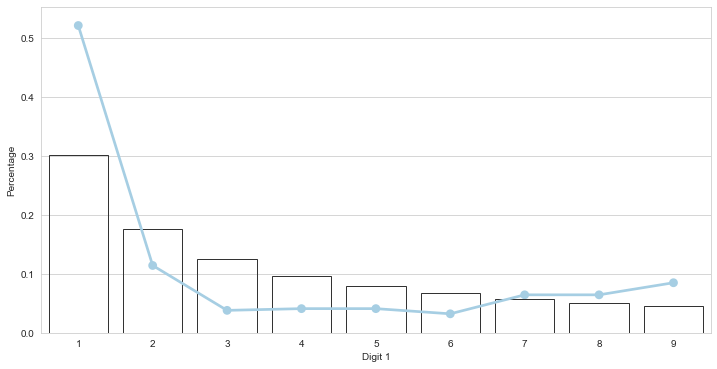

In [34]:
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig, (ax1) = plt.subplots(nrows = 1, figsize = (12, 6))
sns.barplot(x = 'n', y = 'b', data = benford_predict, color = 'black', facecolor=(1, 1, 1, 0), edgecolor = '0.2', ax = ax1)
sns.pointplot(x = 'Digit 1', y = 'Percentage', data = vendor_Percentage.reset_index(), ax = ax1, )

After plotting this against the Benford distribution, it appears visually that the digit 1 is a severe deviation and 9 may also be a deviation.  

Let's take a look at the vendors in particular.

#### Vendor Analysis

In [35]:
vendor1 = merged.groupby(['Digit 1', 'LIFNR', 'WRBTR'])['LIFNR'].count().reset_index(name='Vendor Count')
vendor1 = vendor1[vendor1['Digit 1'] == 1]
vendor1

,Digit 1,LIFNR,WRBTR,Vendor Count
0,1,125000.0,11000,1
1,1,125014.0,148148,1
2,1,125098.0,15000,1
3,1,125101.0,1578116,1
4,1,125104.0,100058,2
...,...,...,...,...
61,1,125135.0,150500,1
62,1,125135.0,16588027,1
63,1,125135.0,175000,1
64,1,125135.0,186760,1


In order to apply the Benford analysis, I will convert the WRBTR amount into a numeric value to sum and display the vendors with the highest amounts.  Recall that this sample space only includes transactions where the leading digit is 1.

In [36]:
vendor1.dtypes

Digit 1           int64
LIFNR           float64
WRBTR            object
Vendor Count      int64
dtype: object

In [37]:
vendor1['WRBTR'] = pd.to_numeric(vendor1['WRBTR'], errors = 'coerce')

In [38]:
vendor_Total = vendor1.groupby(['Digit 1', 'LIFNR'])['WRBTR'].sum().rename('Amount')
vendor_Total

Digit 1  LIFNR   
1        125000.0       11000
         125014.0      148148
         125098.0       15000
         125101.0     1578116
         125104.0      100058
         125105.0        1000
         125107.0        1000
         125121.0       10000
         125131.0    16395978
         125134.0        2927
         125135.0    31603633
Name: Amount, dtype: int64

In [39]:
vendor1_Percentage = vendor_Total / vendor_Total.groupby(level = 0).sum()
pd.DataFrame(vendor1_Percentage)

Amount
Digit 1 LIFNR             
1       125000.0  0.000221
        125014.0  0.002971
        125098.0  0.000301
        125101.0  0.031647
        125104.0  0.002007
        125105.0  0.000020
        125107.0  0.000020
        125121.0  0.000201
        125131.0  0.328795
        125134.0  0.000059
        125135.0  0.633760

Vendor 125135 is responsible for over 60% of the transaction amounts (leading with the digit 1) worth $31 million, so any further investigations may be best suited to begin there.

In [40]:
vendorLIFNR = merged.groupby(['Digit 1', 'LIFNR'])['Digit 1'].count().reset_index(name='Vendor Count')
vendorLIFNR_Total = vendorLIFNR.groupby(['Digit 1', 'LIFNR'])['Vendor Count'].sum().rename('Percentage')
vendorLIFNR_Total

vendorLIFNR_Percentage = vendorLIFNR_Total / vendorLIFNR_Total.groupby(level = 0).sum()
pd.DataFrame(vendorLIFNR_Percentage)

Percentage
Digit 1 LIFNR               
1       125000.0    0.005618
        125014.0    0.005618
        125098.0    0.005618
        125101.0    0.005618
        125104.0    0.011236
        125105.0    0.022472
        125107.0    0.112360
        125121.0    0.016854
        125131.0    0.398876
        125134.0    0.016854
        125135.0    0.398876
2       125127.0    0.025641
        125131.0    0.461538
        125134.0    0.051282
        125135.0    0.461538
3       125107.0    0.076923
        125131.0    0.384615
        125135.0    0.538462
4       125104.0    0.142857
        125131.0    0.500000
        125135.0    0.357143
5       125104.0    0.571429
        125131.0    0.285714
        125135.0    0.142857
6       125104.0    0.363636
        125131.0    0.363636
        125135.0    0.272727
7       125104.0    0.363636
        125107.0    0.045455
        125131.0    0.227273
        125134.0    0.272727
        125135.0    0.090909
8       125104.0    0.136364
        125131.0    0.045455
        125134.0    0.818182
9       125104.0    0.137931
        125131.0    0.103448
        125134.0    0.620690
        125135.0    0.137931

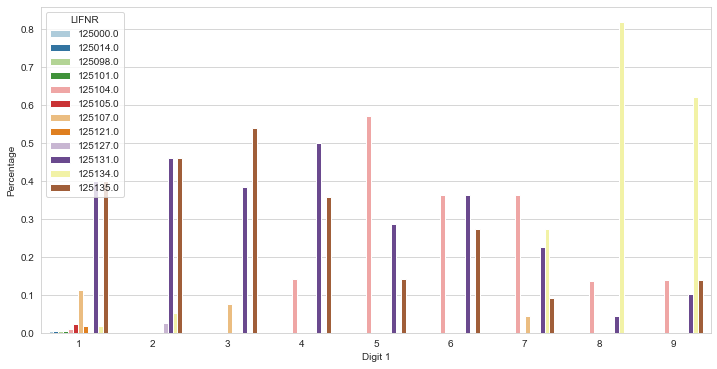

In [41]:
fig, (ax1) = plt.subplots(nrows = 1, figsize = (12, 6))

sns.barplot(x = 'Digit 1', y = 'Percentage', data = vendorLIFNR_Percentage.reset_index(), ax = ax1, hue = 'LIFNR')

After examining the distribution by vendor account, 125134 stands out as it comprises the majority (at over 60%) of the transactions with leading digits of 8 and 9.

Next, I will run through the user data.

#### User Analysis

In [42]:
user1 = merged.groupby(['Digit 1', 'USNAM', 'WRBTR'])['USNAM'].count().reset_index(name='User Count')
user1 = user1[user1['Digit 1'] == 1]
user1.head()

,Digit 1,USNAM,WRBTR,User Count
0,1,GBI-005,10000000,1
1,1,GBI-005,1010,1
2,1,GBI-005,10100,1
3,1,GBI-005,1010000,1
4,1,GBI-005,10100000,1


In [43]:
user1.dtypes

Digit 1        int64
USNAM         object
WRBTR         object
User Count     int64
dtype: object

In [44]:
user1['WRBTR'] = pd.to_numeric(user1['WRBTR'], errors = 'coerce')

In [45]:
user1_Total = user1.groupby(['Digit 1', 'USNAM'])['WRBTR'].sum().rename('Amount')
user1_Total

Digit 1  USNAM    
1        GBI-005      25171866
         GBI-026      19661969
         GBIFAC-01     3653581
Name: Amount, dtype: int64

In [46]:
user_Percentage = user1_Total / user1_Total.sum()
user_Percentage
pd.DataFrame(user_Percentage)

Amount
Digit 1 USNAM              
1       GBI-005    0.519142
        GBI-026    0.405507
        GBIFAC-01  0.075351

GBI-005 and GBI-026 are responsible for over 90% of the transaction amounts (leading with the digit 1) worth over $40 million, so any further investigations may be best suited to begin there.

In [47]:
userUSNAM = merged.groupby(['Digit 1', 'USNAM'])['Digit 1'].count().reset_index(name='User Count')
userUSNAM_Total = userUSNAM.groupby(['Digit 1', 'USNAM'])['User Count'].sum().rename('Percentage')
userUSNAM_Total

userUSNAM_Percentage = userUSNAM_Total / userUSNAM_Total.groupby(level = 0).sum()
pd.DataFrame(userUSNAM_Percentage)

Percentage
Digit 1 USNAM                
1       GBI-005      0.152542
        GBI-026      0.485876
        GBIFAC-01    0.361582
2       GBI-005      0.435897
        GBI-026      0.205128
        GBIFAC-01    0.358974
3       GBI-005      0.153846
        GBI-026      0.615385
        GBIFAC-01    0.230769
4       GBI-026      0.857143
        GBIFAC-01    0.142857
5       GBI-005      0.071429
        GBI-026      0.714286
        GBIFAC-01    0.214286
6       GBI-005      0.181818
        GBI-026      0.727273
        GBIFAC-01    0.090909
7       GBI-026      0.681818
        GBIFAC-01    0.318182
8       GBI-026      0.181818
        GBIFAC-01    0.818182
9       GBI-005      0.068966
        GBI-026      0.206897
        GBIFAC-01    0.724138

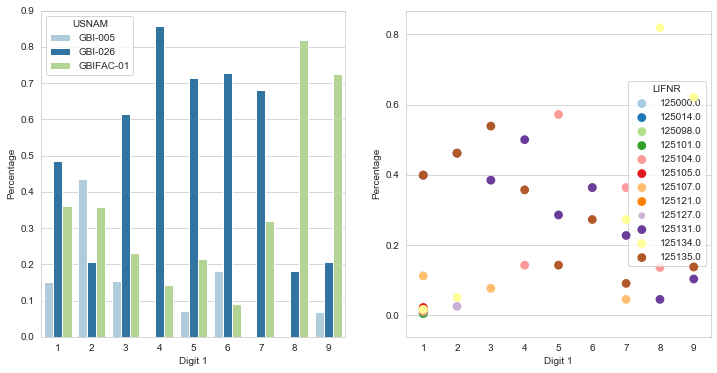

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

sns.barplot(x = 'Digit 1', y = 'Percentage', data = userUSNAM_Percentage.reset_index(), ax = ax1, hue = 'USNAM')
#sns.barplot(x = 'Digit 1', y = 'Percentage', data = vendorLIFNR_Percentage.reset_index(), ax = ax2, hue = 'LIFNR')

#sns.pointplot(x = 'Digit 1', y = 'Percentage', data = userUSNAM_Percentage.reset_index(), ax = ax1, hue = 'USNAM')
sns.pointplot(x = 'Digit 1', y = 'Percentage', data = vendorLIFNR_Percentage.reset_index(), ax = ax2, hue = 'LIFNR', join = False)

After examining the distribution by user name, GBIFAC-01 stands out as it comprises the majority (at over 70%) of the transactions with leading digits of 8 and 9.  GBI-026 visually stands out as leading the transactions with leading digits of 3 through 7, but recall that our preliminary Benford distribution did not highlight any significant deviations.

Let's examine the GBIFAC-01 transactions using the 125134 account.

In [49]:
len(merged[(merged['LIFNR'] == 125134) & (merged['USNAM'] == 'GBIFAC-01')])

46

In [50]:
merged[(merged['LIFNR'] == 125134) & (merged['USNAM'] == 'GBIFAC-01')]['WRBTR'].astype('float').sum()

3757350.0

There are 46 transactions worth nearly $4 million to examine.  

In [51]:
merged[(merged['LIFNR'] == 125134) & (merged['USNAM'] == 'GBIFAC-01')]

,MANDT_x,BUKRS_x,BELNR,GJAHR_x,BUZEI,BSCHL,WRBTR,LIFNR,Digit 1,Digit 2,Digit 3,MANDT_y,BUKRS_y,GJAHR_y,BLART,USNAM
268,375,US00,1.500000e+09,2017,2,25,1927,125134,1,9,2,375.0,US00,2017.0,KZ,GBIFAC-01
269,375,US00,1.500000e+09,2017,2,25,27902,125134,2,7,9,375.0,US00,2017.0,KZ,GBIFAC-01
270,375,US00,1.500000e+09,2017,2,25,86241,125134,8,6,2,375.0,US00,2017.0,KZ,GBIFAC-01
271,375,US00,1.500000e+09,2017,2,25,72117,125134,7,2,1,375.0,US00,2017.0,KZ,GBIFAC-01
272,375,US00,1.500000e+09,2017,2,25,81321,125134,8,1,3,375.0,US00,2017.0,KZ,GBIFAC-01
273,375,US00,1.500000e+09,2017,2,25,97473,125134,9,7,4,375.0,US00,2017.0,KZ,GBIFAC-01
274,375,US00,1.500000e+09,2017,2,25,93249,125134,9,3,2,375.0,US00,2017.0,KZ,GBIFAC-01
275,375,US00,1.500000e+09,2017,2,25,89658,125134,8,9,6,375.0,US00,2017.0,KZ,GBIFAC-01
276,375,US00,1.500000e+09,2017,2,25,87776,125134,8,7,7,375.0,US00,2017.0,KZ,GBIFAC-01
277,375,US00,1.500000e+09,2017,2,25,92105,125134,9,2,1,375.0,US00,2017.0,KZ,GBIFAC-01


***

## Conclusion

The conclusion is that there is evidence of an anomaly within the 2017 SAP BSEG and BKPF tables.  Specifically, the GBIFAC-01 and 125134 transactions should be given additional scrutiny.  For additional analysis, the following tests can be conducted:
1. The second digit test
2. The leading two digits test
3. The leading three digits test
4. The trailing two digits test

Lastly, with deeper knowledge of the SAP tables, supplementary data analysis could be performed for instance on incoming vendor payments.

***

## Disclaimer

1. No liability for any errors or omissions

The information contained in this report has been provided for information purposes only. This information does not constitute legal, professional or commercial advice. While every care has been taken to ensure that the content is useful and accurate, there are no guarantees, undertakings or warranties in this regard, and any legal liability or responsibility for the content or the accuracy of the information so provided, or, for any loss or damage caused arising directly or indirectly in connection with reliance on the use of such information is forfeited. Any errors or omissions brought to the attention will be corrected as soon as possible.

The information in this website may contain technical inaccuracies and typographical errors. The information in this website may be updated from time to time and may at times be out of date.  There is no responsibility for keeping the information in this website up to date or any liability whatsoever for any failure to do so.

2. Material on this website does not constitute legal and/or professional advice

Any views, opinions and guidance set out in this report are provided for information purposes only, and do not purport to be legal and/or professional advice or a definitive interpretation of any law. Anyone contemplating action in respect of matters set out in this report should obtain advice from a suitably qualified professional adviser based on their unique requirements.

***

## Appendix

https://www.leanx.eu/en/sap/table/bseg.html

https://www.leanx.eu/en/sap/table/bkpf.html

http://sap-ficoexpert.blogspot.com/2011/12/posting-keys.html

https://it.toolbox.com/question/fi-document-types-101201